# Zadanie 2: Przeuczenie i Niedouczenie sieci neuronowych

## Potrzebne importy i przygotowanie danych

In [1]:
# import numpy as np
# import keras
import pandas as pd
# import tensorflow as tf
from keras import layers
from keras import models
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2024-04-15 11:24:50.187517: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Wybrany przeze mnie zbiór danych to [Web Page Phishing](https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset). Zawiera ponad 100,000 rekordów informacji dotyczących linków, np. jego długość, ilość występowania konkretnych znaków czy informacje o przekierowaniu oraz etykietę - czy dany link jest phishingiem. Pracę zaczniemy od wczytania i sprawdzenia kompletności danych.

In [2]:
df = pd.read_csv('web-page-phishing.csv')
df.dtypes

url_length        int64
n_dots            int64
n_hypens          int64
n_underline       int64
n_slash           int64
n_questionmark    int64
n_equal           int64
n_at              int64
n_and             int64
n_exclamation     int64
n_space           int64
n_tilde           int64
n_comma           int64
n_plus            int64
n_asterisk        int64
n_hastag          int64
n_dollar          int64
n_percent         int64
n_redirection     int64
phishing          int64
dtype: object

In [3]:
df.isna().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
n_redirection     0
phishing          0
dtype: int64

Przygotowanie danych do procesu uczenia

In [4]:
data = df.drop('phishing', axis=1)
labels = df['phishing']

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15)

## Tworzenie modelu

### Wybór struktury sieci

In [5]:
def create_2_layer_model(n_units_l1=16, n_units_l2=8, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu'))
    model.add(layers.Dense(n_units_l2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def create_1_layer_model(n_units=16, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [6]:
model_8 = create_1_layer_model(8, name='model_8')
model_16 = create_1_layer_model(16, name='model_16')
model_32 = create_1_layer_model(32, name='model_32')
model_64 = create_1_layer_model(64, name='model_64')

model_8_4 = create_2_layer_model(8, 4, name='model_8-4')
model_16_8 = create_2_layer_model(16, 8, name='model_16-8')
model_32_16 = create_2_layer_model(32, 16, name='model_32-16')
model_64_32 = create_2_layer_model(64, 32, name='model_64-32')

In [7]:
models_1_layer = [model_8, model_16, model_32, model_64]
models_2_layers = [model_8_4, model_16_8, model_32_16, model_64_32]
histories_1_layer= []
histories_2_layers = []

n_epochs = 30

for model in models_1_layer:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_1_layer.append(history)

for model in models_2_layers:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_2_layers.append(history)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6339 - loss: 1.6265 - val_accuracy: 0.8018 - val_loss: 0.5626
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8126 - loss: 0.5302 - val_accuracy: 0.8390 - val_loss: 0.4611
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8416 - loss: 0.4460 - val_accuracy: 0.8426 - val_loss: 0.4034
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8468 - loss: 0.3957 - val_accuracy: 0.8490 - val_loss: 0.3730
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8494 - loss: 0.3723 - val_accuracy: 0.8523 - val_loss: 0.3565
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8540 - loss: 0.3579 - val_accuracy: 0.8571 - val_loss: 0.3470
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8545 - loss: 0.3515 - val_accuracy: 0.8583 - val_loss: 0.3421
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8553 - loss: 0.3454 - val_accuracy: 0.

In [8]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)

def plot_accuracies(histories, title=None):
    plt.figure()
    colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'orange']
    if len(histories) > len(colors):
        raise ValueError('histories may contain at most 8 elements')
    epochs = range(1, len(histories[0].history['accuracy']))
    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['accuracy'][1:], f'-{colors[i]}', label=f'train accuracy for {histories[i].model.name}')
        plt.plot(epochs, history.history['val_accuracy'][1:], f'--{colors[i]}', label=f'validation accuracy for {histories[i].model.name}')
    title = title if title else 'model accuracy'
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

def plot_losses(histories, title=None):
    plt.figure()
    colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'orange']
    if len(histories) > len(colors):
        raise ValueError('histories may contain at most 8 elements')
    epochs = range(1, len(histories[0].history['loss']))
    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['loss'][1:], f'-{colors[i]}', label=f'train loss for {histories[i].model.name}')
        plt.plot(epochs, history.history['val_loss'][1:], f'--{colors[i]}', label=f'validation loss for {histories[i].model.name}')
    title = title if title else 'model loss'
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

def compare_accuracies(histories):
    for history in histories:
        print(f'{history.model.name} validation accuracy: {history.history["val_accuracy"][-1]}')
    max_accuracy = max([history.history['val_accuracy'][-1] for history in histories])
    for model in histories:
        if model.history['val_accuracy'][-1] == max_accuracy:
            print(f'max accuracy {max_accuracy} achieved by {model.model.name}\n')
            break

Porównanie modeli o różnych strukturach

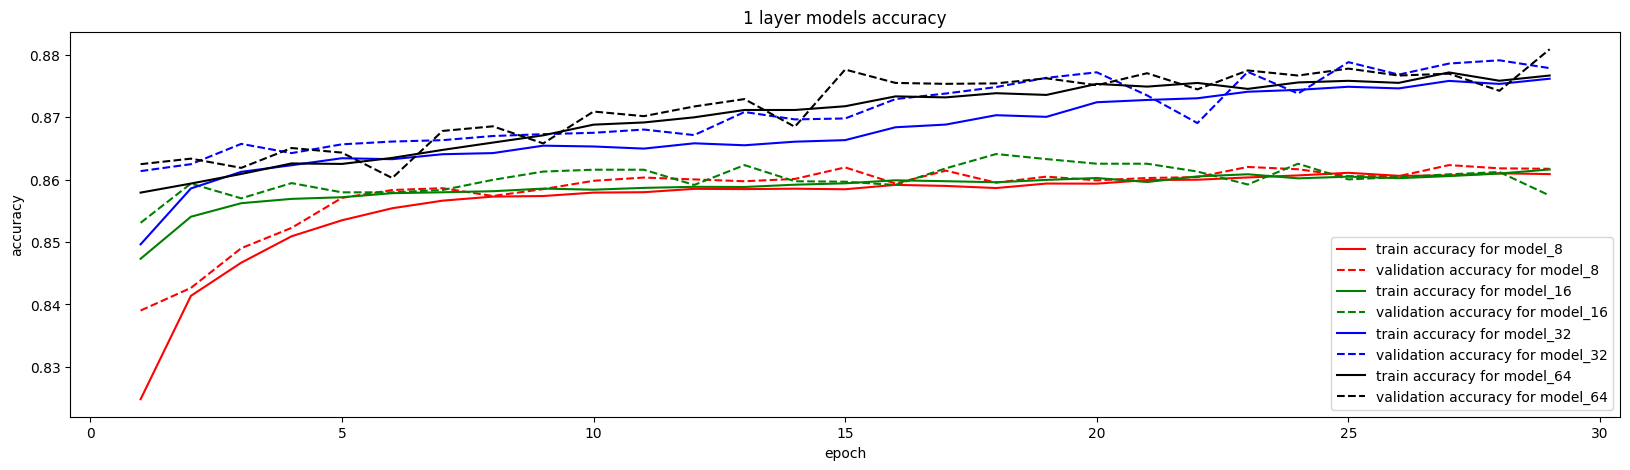

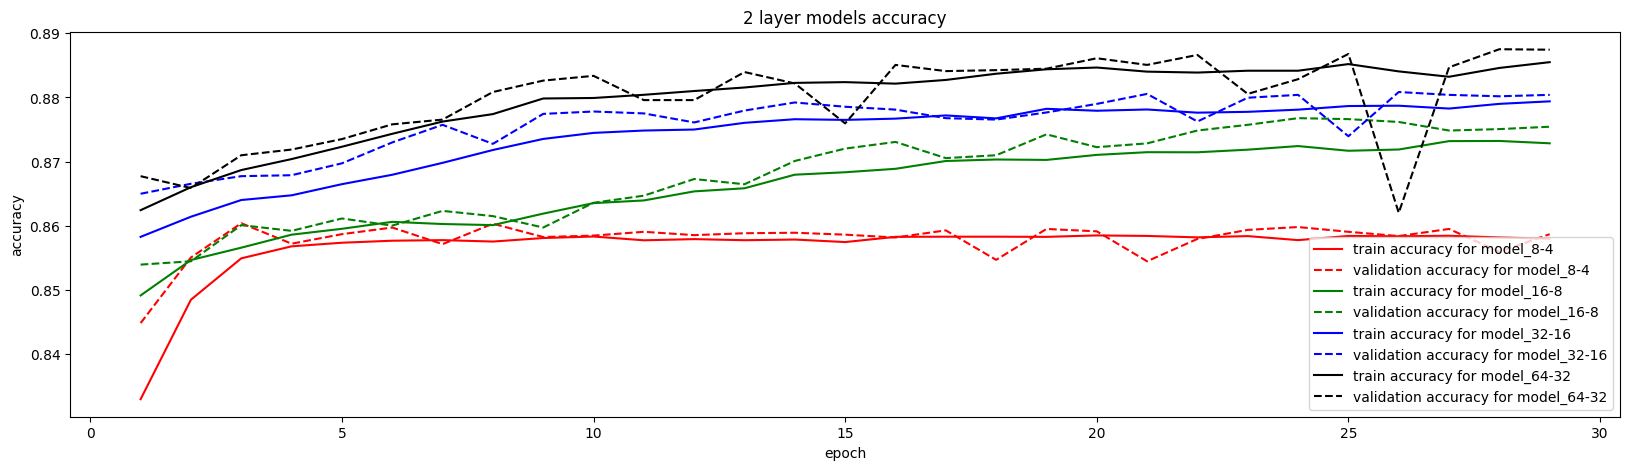

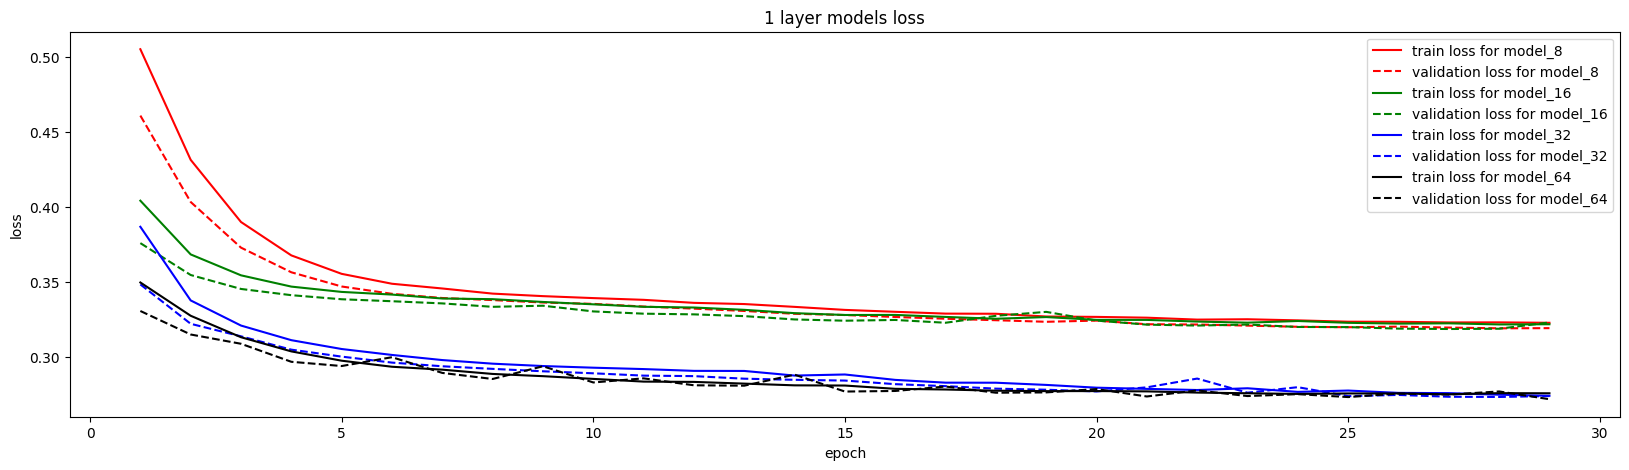

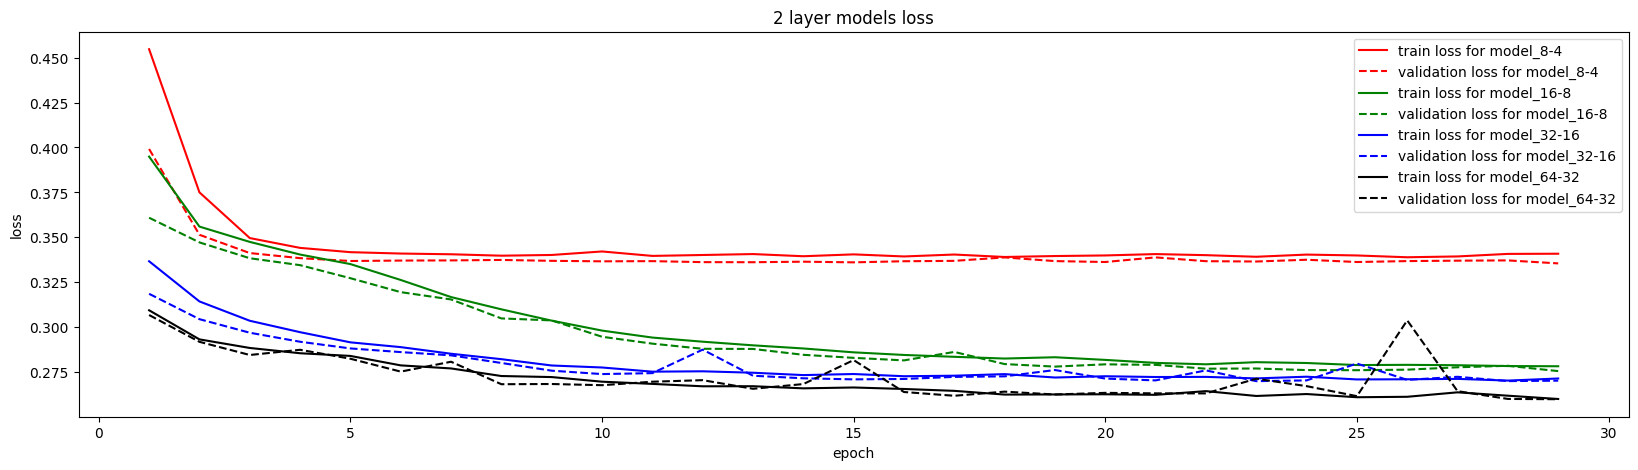

model_8 validation accuracy: 0.8617422580718994
model_16 validation accuracy: 0.857449471950531
model_32 validation accuracy: 0.8778772950172424
model_64 validation accuracy: 0.8809118270874023
max accuracy 0.8809118270874023 achieved by model_64

model_8-4 validation accuracy: 0.8587077260017395
model_16-8 validation accuracy: 0.8754348158836365
model_32-16 validation accuracy: 0.8803937435150146
model_64-32 validation accuracy: 0.8874250650405884
max accuracy 0.8874250650405884 achieved by model_64-32



In [9]:
plot_accuracies(histories_1_layer, title='1 layer models accuracy')
plot_accuracies(histories_2_layers, title='2 layer models accuracy')

plot_losses(histories_1_layer, title='1 layer models loss')
plot_losses(histories_2_layers, title='2 layer models loss')

compare_accuracies(histories_1_layer)
compare_accuracies(histories_2_layers)

Najbardziej skuteczny okazał sie model 64-32. Będziemy z niego korzystać w kolejnych etapach.

## Regularyzacja

Różnica między skutecznością na danych treningowych i walidacyjnych jest niewielka, sieć nie wykazuje przeuczenia. Sprobójmy jednak zbadać co się stanie jeżeli zastosujemy regularyzację.

### Regularyzacja wag

Wypróbójemy 3 sposoby regularyzacji wag: L1, L2 oraz L1 + L2.

In [10]:
def create_L1_model(n_units_l1=64, n_units_l2=32, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(n_units_l2, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def create_L2_model(n_units_l1=64, n_units_l2=32, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(n_units_l2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def create_L1_L2_model(n_units_l1=64, n_units_l2=32, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
    model.add(layers.Dense(n_units_l2, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [11]:
model_l1 = create_L1_model(name='model_l1')
model_l2 = create_L2_model(name='model_l2')
model_l1_l2 = create_L1_L2_model(name='model_l1_l2')

In [12]:
regularized_models = [model_l1, model_l2, model_l1_l2]
histories_regularized = []

for model in regularized_models:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_regularized.append(history)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7428 - loss: 0.8788 - val_accuracy: 0.8592 - val_loss: 0.4262
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8581 - loss: 0.4194 - val_accuracy: 0.8630 - val_loss: 0.3913
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - loss: 0.3867 - val_accuracy: 0.8629 - val_loss: 0.3783
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.3765 - val_accuracy: 0.8661 - val_loss: 0.3639
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8639 - loss: 0.3658 - val_accuracy: 0.8663 - val_loss: 0.3559
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8648 - loss: 0.3571 - val_accuracy: 0.8672 - val_loss: 0.3490
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8641 - loss: 0.3533 - val_accuracy: 0.8691 - val_loss: 0.3442
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3430 - val_accuracy: 0.

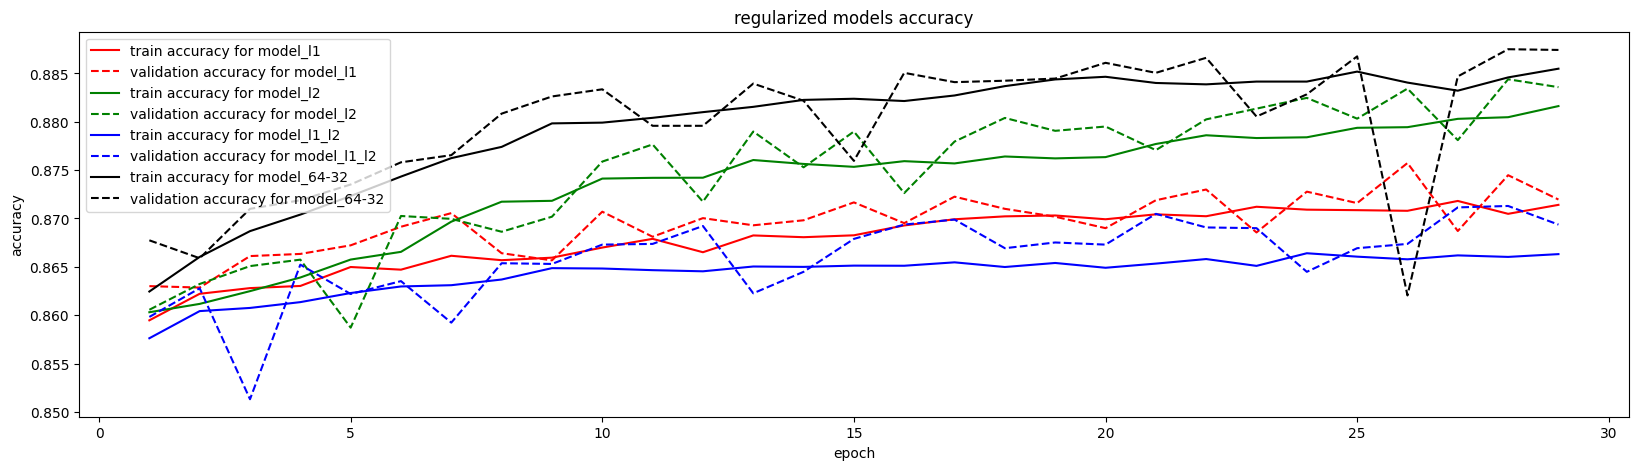

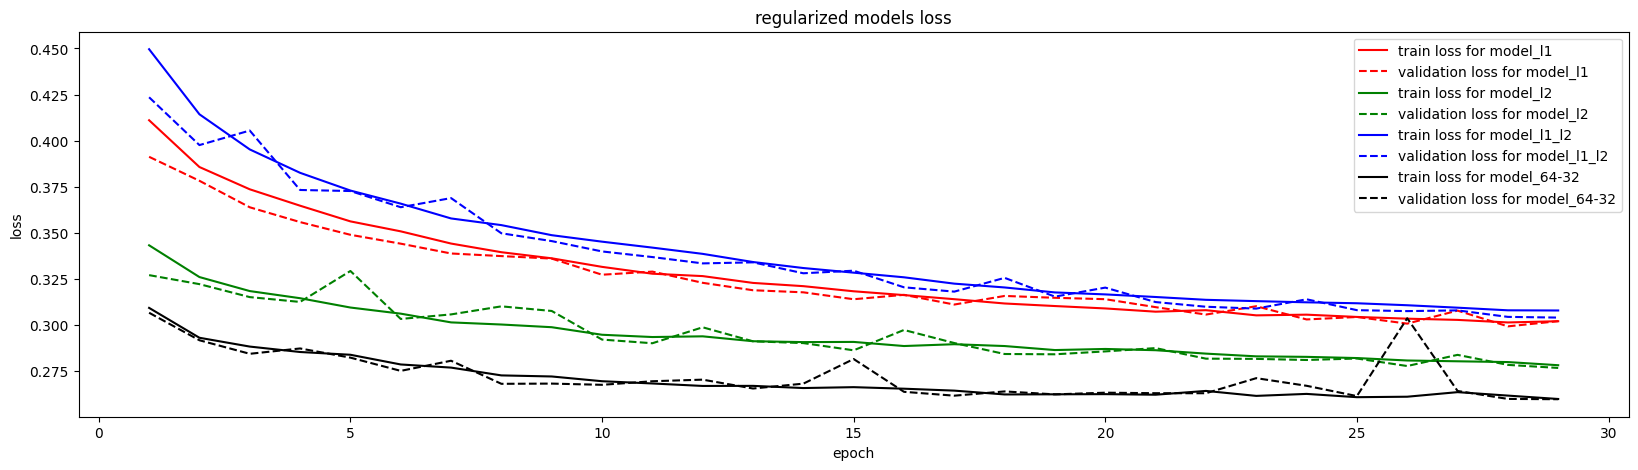

model_l1 validation accuracy: 0.8719561696052551
model_l2 validation accuracy: 0.8835763335227966
model_l1_l2 validation accuracy: 0.8693656921386719
model_64-32 validation accuracy: 0.8874250650405884
max accuracy 0.8874250650405884 achieved by model_64-32



In [13]:
histories_regularized_with_comparison = histories_regularized.copy()
histories_regularized_with_comparison.append(histories_2_layers[3])

plot_accuracies(histories_regularized_with_comparison, title='regularized models accuracy')

plot_losses(histories_regularized_with_comparison, title='regularized models loss')

compare_accuracies(histories_regularized_with_comparison)

Jak można było się spodziewać, ze względu na brak występowania przeuczenia, regularyzacja wag nie okazała się być korzystna dla naszego modelu. W kolejnym kroku będziemy korzystać z modelu bez tej regularyzacji.

### Dropout

In [14]:
def create_dropout_model(n_units_l1=64, n_units_l2=32, dropout=0.5, name=None):
    model = models.Sequential(name=name if name is not None else None)
    model.add(layers.Input(shape=(data.shape[1],)))
    model.add(layers.Dense(n_units_l1, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(n_units_l2, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [15]:
model_dropout_10 = create_dropout_model(dropout=0.1, name='model_dropout_0.1')
model_dropout_20 = create_dropout_model(dropout=0.25, name='model_dropout_0.25')
model_dropout_50 = create_dropout_model(dropout=0.5, name='model_dropout_0.5')

In [16]:
dropout_models = [model_dropout_10, model_dropout_20, model_dropout_50]
histories_dropout = []

for model in dropout_models:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=256, validation_data=(X_valid, y_valid))
    histories_dropout.append(history)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6559 - loss: 1.0081 - val_accuracy: 0.8617 - val_loss: 0.3348
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8491 - loss: 0.3712 - val_accuracy: 0.8658 - val_loss: 0.3024
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3259 - val_accuracy: 0.8679 - val_loss: 0.2939
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8628 - loss: 0.3094 - val_accuracy: 0.8675 - val_loss: 0.2885
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8665 - loss: 0.3011 - val_accuracy: 0.8702 - val_loss: 0.2858
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8645 - loss: 0.3017 - val_accuracy: 0.8711 - val_loss: 0.2821
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8683 - loss: 0.2917 - val_accuracy: 0.8714 - val_loss: 0.2815
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.2929 - val_accuracy: 0.

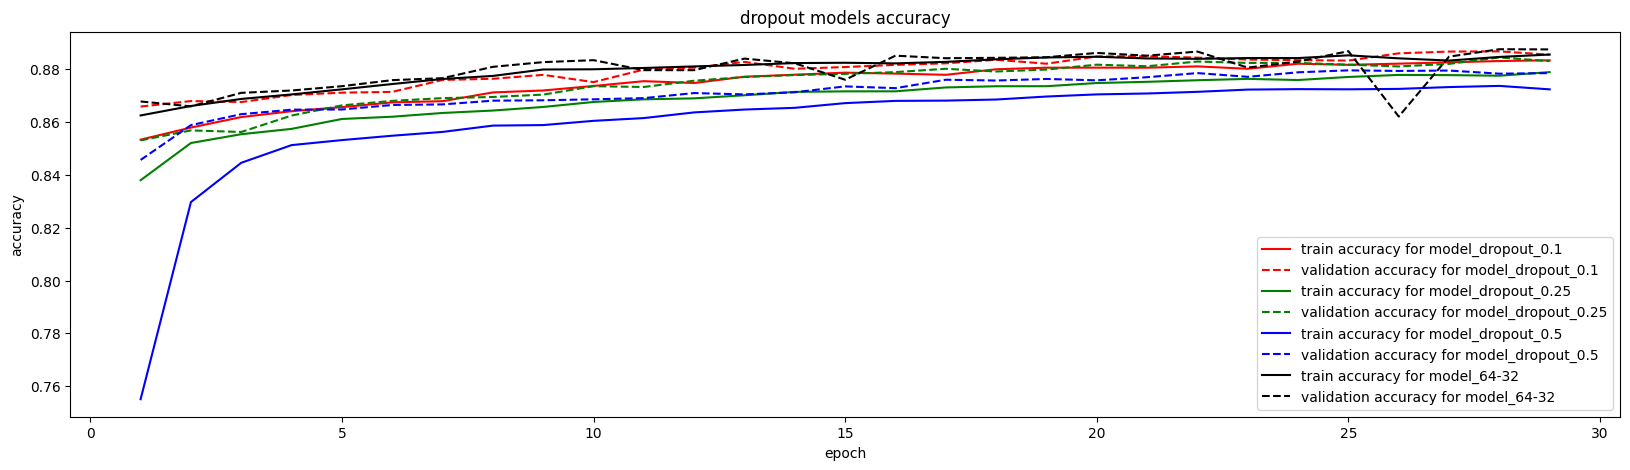

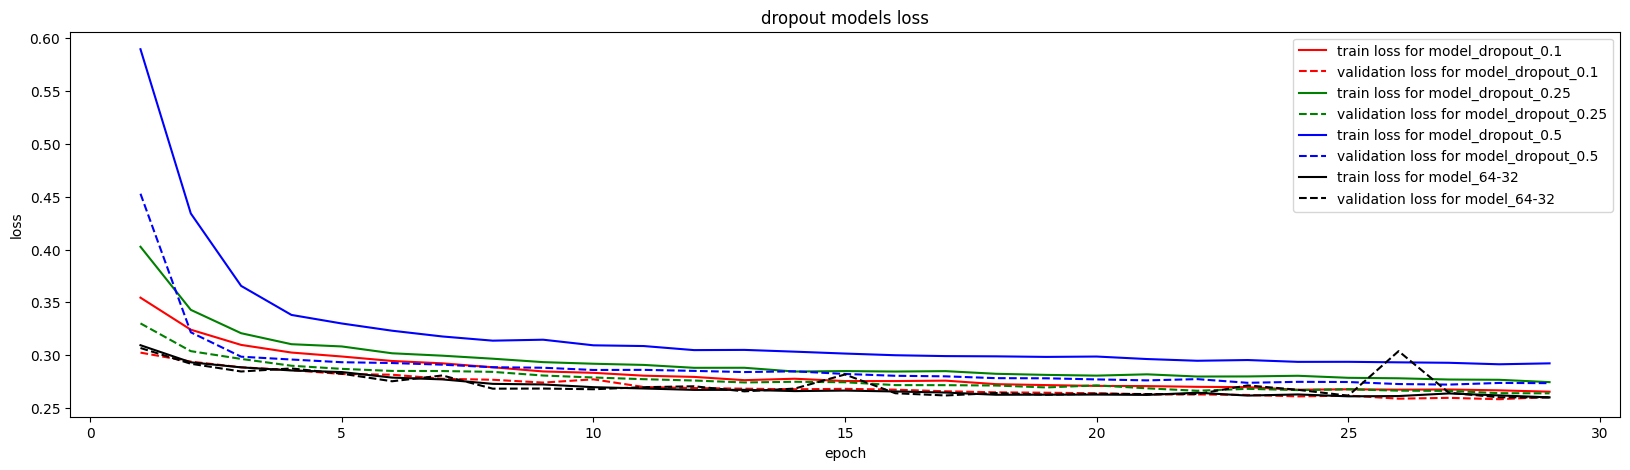

model_dropout_0.1 validation accuracy: 0.8854267001152039
model_dropout_0.25 validation accuracy: 0.8829842209815979
model_dropout_0.5 validation accuracy: 0.8784694075584412
model_64-32 validation accuracy: 0.8874250650405884
max accuracy 0.8874250650405884 achieved by model_64-32



In [17]:
histories_dropout_with_comparison = histories_dropout.copy()
histories_dropout_with_comparison.append(histories_2_layers[3])

plot_accuracies(histories_dropout_with_comparison, title='dropout models accuracy')

plot_losses(histories_dropout_with_comparison, title='dropout models loss')

compare_accuracies(histories_dropout_with_comparison)

Modele z niewielkim dropoutem (0.1 i 0.25) wykazują niewiele niższą skuteczność niż sieć bez regularyzacji.

## Wnioski

W naszym przypadku regularyzacja nie przyczyniła się do poprawienia rezultatów sieci. Powodem jest brak przeuczenia. Być może gdyby zastosowany model był bardziej skomplikowany (większa ilość warstw/więcej jednostek w warstwach) lub dłużej uczyli model uzyskalibyśmy lepsze wyniki.

Podczas pracy z tym notebookiem nauczyłem się: 
- jak radzić sobie z przeuczeniem/niedouczeniem w sieciach neuronowych
- wpływie regularyzacji na wydajność sieci
- sposobach przeprowadzania regularyzacji: regularyzacja wag i dropout